# 6.0002 Lecture 10: Understanding Experimental Data (cont.)

**Speaker:** Prof. Eric Grimson

## Remember our goal
- want to find a model that fits experimental data well
- model will then allow us to explain phenomena, and to make predictions about behavior in new setting
- know that data is unlikely to be perfect, so have to account for uncertainty in measurements or observations
- sometimes have theoretical knowledge of structure of model, but not always
    - in latter case, want to try to find best model from class of options

## Solving for Least Squares (recap)
$$\sum_{i=0}^{\textrm{len(observed)}-1}(\textrm{observed}[i] - \textrm{predicted}[i])^2$$
- given observed data, and model prediction of expected values, can measure goodness of fit of model to observation using sum-of-squared-differences (or mean-squared-error)
- want to find best model for predicting values
- predicted values often come from mathematical expression, with set of parameters that can vary -- typically a polynomial expression
- use linear regression to find best model that minimizes difference, for polynomial model, this include coefficients, and may include order of polynomial
- simple example:
    - use a degree-one polynomial, $y = ax + b$, as model of our data (we want best fitting line)
- find values of $a$ and $b$ such that when we use the polynomial to predict $y$ values for all of the $x$ values in our experiment, the squared difference of these values and the corresponding observed values is minimized
- a **linear regression** problem

## Finding the best curve (simplest case)
- the set of all possible lines can be represented by a point in $a$-$b$ parameter space
- imagine a surface in this space, where height of the surface is the value of the objective function
- starting at any point on the surface, walk "downhill", until you reach the "bottom"
- corresponding point is the best line to fit to data
- can generalize to higher order models
    - higher dimensional parameter spaces

## (Helper code from last time)

In [1]:
# import libraries
import random, pylab, numpy

In [2]:
# set plot params

#set line width
pylab.rcParams['lines.linewidth'] = 4
#set font size for titles 
pylab.rcParams['axes.titlesize'] = 20
#set font size for labels on axes
pylab.rcParams['axes.labelsize'] = 20
#set size of numbers on x-axis
pylab.rcParams['xtick.labelsize'] = 16
#set size of numbers on y-axis
pylab.rcParams['ytick.labelsize'] = 16
#set size of ticks on x-axis
pylab.rcParams['xtick.major.size'] = 7
#set size of ticks on y-axis
pylab.rcParams['ytick.major.size'] = 7
#set size of markers
pylab.rcParams['lines.markersize'] = 10
#set number of examples shown in legends
pylab.rcParams['legend.numpoints'] = 1

In [5]:
# helper code
def getData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    masses = []
    dataFile.readline() #discard header
    for line in dataFile:
        d, m = line.split()
        distances.append(float(d))
        masses.append(float(m))
    dataFile.close()
    return (masses, distances)
    
def labelPlot():
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('|Force| (Newtons)')
    pylab.ylabel('Distance (meters)')

def plotData(fileName):
    xVals, yVals = getData(fileName)
    xVals = pylab.array(xVals)
    yVals = pylab.array(yVals)
    xVals = xVals*9.81  #acc. due to gravity
    pylab.plot(xVals, yVals, 'bo',
               label = 'Measured displacements')
    labelPlot()
    
def fitData(fileName):
    xVals, yVals = getData(fileName)
    xVals = pylab.array(xVals)
    yVals = pylab.array(yVals)
    xVals = xVals*9.81 #get force
    pylab.plot(xVals, yVals, 'bo',
               label = 'Measured points')
    labelPlot()                 
    a,b = pylab.polyfit(xVals, yVals, 1)
    estYVals = a*pylab.array(xVals) + b
    print('a =', a, 'b =', b)
    pylab.plot(xVals, estYVals, 'r',
               label = 'Linear fit, k = '
               + str(round(1/a, 5)))
    pylab.legend(loc = 'best')
   
def fitData1(fileName):
    xVals, yVals = getData(fileName)
    xVals = pylab.array(xVals)
    yVals = pylab.array(yVals)
    xVals = xVals*9.81 #get force
    pylab.plot(xVals, yVals, 'bo',
               label = 'Measured points')
    labelPlot()                 
    model = pylab.polyfit(xVals, yVals, 1)
    estYVals = pylab.polyval(model, xVals)
    pylab.plot(xVals, estYVals, 'r',
               label = 'Linear fit, k = '
               + str(round(1/model[0], 5)))
    pylab.legend(loc = 'best')
    
def rSquared(observed, predicted):
    error = ((predicted - observed)**2).sum()
    meanError = error/len(observed)
    return 1 - (meanError/numpy.var(observed))

def genFits(xVals, yVals, degrees):
    models = []
    for d in degrees:
        model = pylab.polyfit(xVals, yVals, d)
        models.append(model)
    return models

def testFits(models, degrees, xVals, yVals, title):
    pylab.plot(xVals, yVals, 'o', label = 'Data')
    for i in range(len(models)):
        estYVals = pylab.polyval(models[i], xVals)
        error = rSquared(yVals, estYVals)
        pylab.plot(xVals, estYVals,
                   label = 'Fit of degree '\
                   + str(degrees[i])\
                   + ', R2 = ' + str(round(error, 5)))
    pylab.legend(loc = 'best')
    pylab.title(title)

## Another experiment (Recap)

Text(0.5, 1.0, 'Mystery Data')

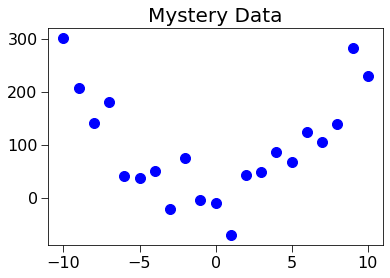

In [10]:
xVals, yVals = getData('mysteryData.txt')
pylab.plot(xVals, yVals, 'bo')
pylab.title('Mystery Data')

## Fit a Line

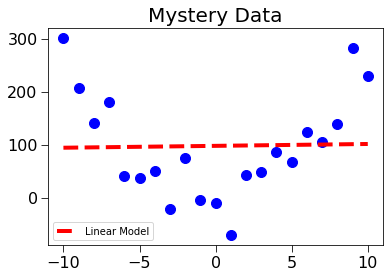

In [16]:
model1 = pylab.polyfit(xVals, yVals, 1)
pylab.plot(xVals, yVals, 'bo')
pylab.title('Mystery Data')
pylab.plot(xVals, pylab.polyval(model1, xVals),
           'r--', label='Linear Model')
pylab.legend(loc='best')

- remember that pylab.polyfit will find parameters of best fitting polynomial of described order
    - in this case (with argument n=1), find the values of $a$ and $b$, such that $y = ax + b$ best matches observed yVals
- remember that pylab.polyval will generate predicted yVals given parameters of model

## Let's try a higher-degree model

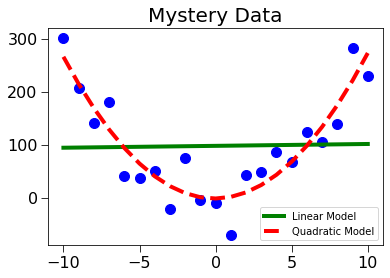

In [17]:
model2 = pylab.polyfit(xVals, yVals, 2)
pylab.plot(xVals, yVals, 'bo')
pylab.title('Mystery Data')
pylab.plot(xVals, pylab.polyval(model1, xVals),
           'g-', label='Linear Model')
pylab.plot(xVals, pylab.polyval(model2, xVals),
           'r--', label='Quadratic Model')
pylab.legend(loc='best')

- quadratic model appears to be a better fit

## Can we get a tighter fit
- what if we try fitting higher order polynomials to the data?
    - does this give us a better fit?
- how would we measue that?
    - in absence of other information (e.g. theoretical insights into order of model), $R^2$ gives us a decent measure of the tightness of the model fit
    - in principle, a model with a higher $R^2$ value is a "better" fit
    $$R^2 = 1 - \frac{\sum_i (y_i - p_i)^2}{\sum_i (y_i - \mu)^2}$$
    - $y_i$ are measured values
    - $p_i$ are predicted values
    - $\mu$ is mean of measured values
    - the numerator gives the error in estimates
    - the denominator gives variability in measured data

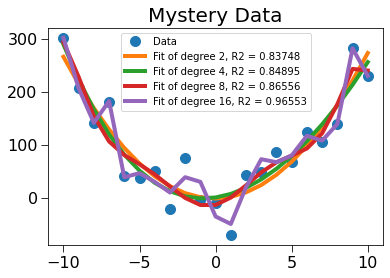

In [18]:
#Compare higher-order fits
degrees = (2, 4, 8, 16)
models = genFits(xVals, yVals, degrees)
testFits(models, degrees, xVals, yVals, 'Mystery Data')


## Why we build models
- looks like an order 16 fit is really good - so should we just use this as our model?
    - to answer, need to ask - why build models in first place?
- helps us understand process that generated the data
    - e.g. the properties of a particular linear spring
- help us make predictions about out-of-sample data
    - e.g. predict the displacement of a spring when a force is applied to it
    - e.g. predict the effect of treatment on a patient
    - e.g. predict the outcome of an election
- a good model helps us to do both of these things

## Motivation for mystery data -- parabola
- trajectory of a particle under the influence of a uniform gravitational field (e.g. Halley's comet)
- position of center of mass of a football pass
- design of a load-bearing arch

## How mystery data was generated

In [19]:
def genNoisyParabolicData(a, b, c, xVals, fName):
    yVals = []
    for x in xVals:
        theoreticalVal = a*x**2 + b*x + c
        yVals.append(theoreticalVal + random.gauss(0, 35))
    f = open(fName, 'w')
    f.write('x        y\n')
    for i in range(len(yVals)):
        f.write(str(yVals[i]) + ' ' + str(xVals[i]) + '\n')
    f.close()

In [20]:
# parameters for generating data
xVals = range(-10, 11, 1)
a, b, c = 3, 0, 0
genNoisyParabolicData(a, b, c, xVals, 'Mystery Data.txt')

- if data was generated by quadratic, why was 16th order polynomial the "best" fit?

## Let's look at two data sets

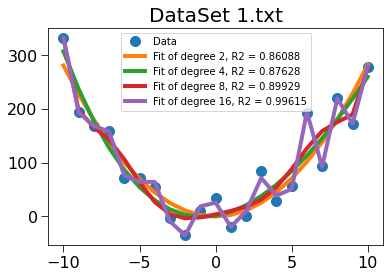

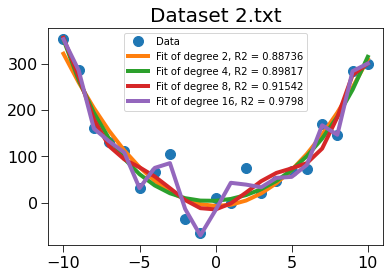

In [22]:
degrees = (2, 4, 8, 16)

random.seed(0)

xVals1, yVals1 = getData('Dataset 1.txt')
models1 = genFits(xVals1, yVals1, degrees)
testFits(models1, degrees, xVals1, yVals1, 'DataSet 1.txt')

pylab.figure()

xVals2, yVals2 = getData('Dataset 2.txt')
models2 = genFits(xVals2, yVals2, degrees)
testFits(models2, degrees, xVals2, yVals2, 'Dataset 2.txt')

## Hence degree 16 is tightest fit
- "best" fitting model is still order 16 polynomial for both data sets, **but** we know data was generated using an order 2 polynomial
- what we are seeing comes from training error
    - how well the model performs on data from which it was learned
    - small training error a necessary condition for a great model, **but NOT a sufficient one**
- we want a model to work well on other data generated by the same process
    - measurements for other weights on the spring
    - position of comets under different forces
    - voters other than those surveyed
- on other words, the model needs to generalize

## Cross validate
- generate models using one dataset, and then test them on another dataset
    - use models for Dataset 1 to predict points for Dataset 2
    - use models for Dataset 2 to predict points for Dataset 1
- expect testing error to be larger than training error
- a better indication of generalizability than training error alone

## Train on Dataset 1, Test on Dataset 2:

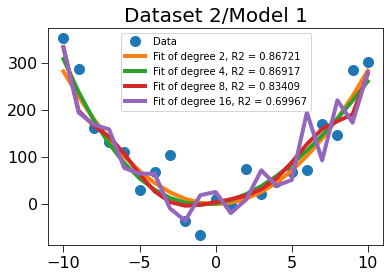

In [24]:
pylab.figure()
testFits(models1, degrees, xVals2, yVals2, 'Dataset 2/Model 1')

## Train on Dataset 2, Test on Dataset 1

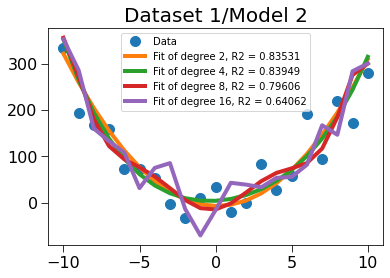

In [25]:
pylab.figure()
testFits(models2, degrees, xVals1, yVals1, 'Dataset 1/Model 2')

## Cross Validation
- now we can see that based on $R^2$ numbers, best model is more likely to be 2nd order or 4th order polynomial (we know it is actually 2nd order, and difference in $R^2$ values is pretty small), but certainly not 16th order
- example of **over fitting** to the data
- can see that if we only fit model to training data, we may not detect that model is too complex; but training on one data set, then testing on a second helps expose this problem

## Increasing the Complexity
- why do we get a "better" fit on training data with higher order model, but then do less well on handling new data?
- what happens when we increase order of polynomial during training?
    - can we get a worse fit to training data?
- if extra term is useless, coefficient will merely be zero
    - just ignores that term
- but if data is noisy, can fit the noise rather than the underlying parameter in the data
    - may lead to a "better" $R^2$ value, but not really a "better" fit

## Fitting a quadratic to a perfect line

a = -0.0 b = 1.0 c = -0.0
R-squared = 1.0


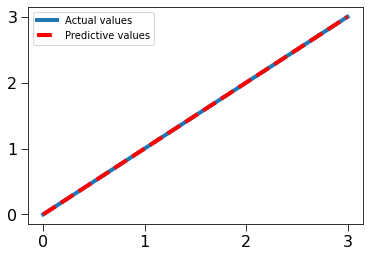

In [34]:
xVals = (0, 1, 2, 3)
yVals = xVals
pylab.plot(xVals, yVals, label = 'Actual values')
a, b, c = pylab.polyfit(xVals, yVals, 2)
print('a =', round(a, 4), 'b =', round(b, 4), 'c =', round(c, 4))
estYVals = pylab.polyval((a, b, c), xVals)
pylab.plot(xVals, estYVals, 'r--', label='Predictive values')
print('R-squared =', rSquared(yVals, estYVals))
pylab.legend(loc='best')

## Predict another point using same model

R-squared = 1.0


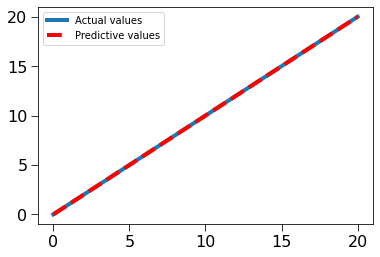

In [33]:
xVals = xVals + (20,)
yVals = xVals
pylab.plot(xVals, yVals, label='Actual values')
estYVals = pylab.polyval((a, b, c), xVals)
pylab.plot(xVals, estYVals, 'r--', label='Predictive values')
print('R-squared =', rSquared(yVals, estYVals))
pylab.legend(loc='best')

## Simulate a small Measurement error

[0.025 0.955 0.005]
R-squared = 0.9999057936881771


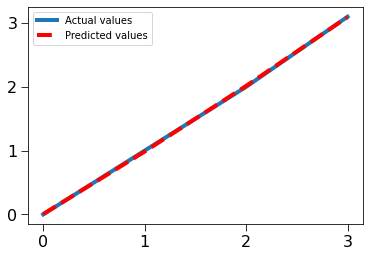

In [32]:
xVals = (0, 1, 2, 3)
yVals = (0, 1, 2, 3.1)
pylab.plot(xVals, yVals, label='Actual values')
model = pylab.polyfit(xVals, yVals, 2)
print(model)
estYVals = pylab.polyval(model, xVals)
pylab.plot(xVals, estYVals, 'r--', label='Predicted values')
print('R-squared =', rSquared(yVals, estYVals))
pylab.legend(loc='best')

## Predict another point using same model

R-squared = 0.6405819002890285


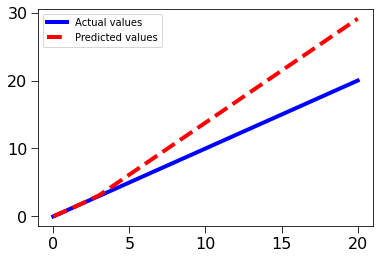

In [31]:
xVals = xVals + (20,)
yVals = xVals
estYVals = pylab.polyval(model, xVals)
print('R-squared =', rSquared(yVals, estYVals))
pylab.figure()
pylab.plot(xVals, yVals, 'b-', label='Actual values')
pylab.plot(xVals, estYVals, 'r--', label='Predicted values')
pylab.legend(loc='best')

# Suppose we had used a first-degree fit

[1.00000000e+00 2.38323279e-15]
R-squared = 1.0


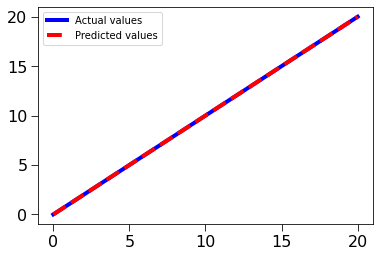

In [37]:
xVals = (0, 1, 2, 3)
yVals = (0, 1, 2, 3.1)
xVals = xVals + (20,)
yVals = xVals
model = pylab.polyfit(xVals, yVals, 1)
print(model)
estYVals = pylab.polyval(model, xVals)
print('R-squared =', rSquared(yVals, estYVals))
pylab.figure()
pylab.plot(xVals, yVals, 'b-', label='Actual values')
pylab.plot(xVals, estYVals, 'r--', label='Predicted values')
pylab.legend(loc='best')

## Comparing first and second degree fits
- predictive ability of first order fit much better than second order fit

## The take home message
- choosing an overly complex model leads to **overfitting** to the training data
- increases the risk of a model that works poorly on data not included in the training set
- on the other hand, choosing an insufficiently complex model has other problems
    - as we saw when we fit a line to data that was basically parabolic
    - "Everything should be made as simple as possible, but not simpler" -- Albert Einstein

## Balancing fit with complexity
- in absence of theory predicting order of model, can engage in a search process
    - fit a low order model to training data
    - test on new data and record $R^2$ value
    - increase order of model and repeat
    - continue until fit on test data begins to decline

## Returning to where we started
- quadratic fit tighter
- but remember Hooke's law: should be linear
- unless we believe theory is wrong, that should guide us
- model holds until elastic limit of spring
- should probably fit different models to different segments of data
- can visualize as search process -- find best place to break into two parts, such that both linear regments have high $R^2$ fits

## Suppose we don't have a solid theory
- use cross-validation results to guide the choice of model complexity
- if dataset small, use leave-one-out cross validation
- if dataset large enough, use k-fold cross validation or repeated-random sampling validation

## Leave-one-out cross validation
- some pseudocode:
    - let D be the original dataset
    - testResults = []
    - for i in range(len(D)):
        - training = D[:].pop()
        - model = buildModel(training)
        - testResults.append(test(model, D[i]))
    - Average testResults
- k-fold very similar
- applies when we have large amount of data
- D partitioned into k equal size sets
- model trained on k-1 sets, and tested on remaining set

## Repeated random sampling
- pseudocode:
    - let D be the original dataset
        - n be the number of random samples
            - usually n between 20% and 50%
        - k be numbe of trials
    - testResults = []
    - for i in range(k):
        - randomly select n elements for testSet, keep rest for training
        - model - buildModel(training)
        - testResults.append(test(model, testSet))
    - Average testResults

## An example: Temperature by year
- task: Model how the mean daily high temperature in the U.S. varied from 1961 through 2015
- get means for each year and plot them
- randomly divide data in half n times
    - for each dimensionality to be tried
        - train on one half of data
        - test on other half
        - record r-squared on test data
- report mean r-squared for each dimensionality

## a boring class

In [38]:
class tempDatum(object):
    def __init__(self, s):
        info = s.split(',')
        self.high = float(info[1])
        self.year = int(info[2][0:4])
    def getHigh(self):
        return self.high
    def getYear(self):
        return self.year

## read data

In [39]:
def getTempData():
    inFile = open('temperatures.csv')
    data = []
    for l in inFile:
        data.append(tempDatum(l))
    return data

## get means

In [40]:
def getYearlyMeans(data):
    years = {}
    for d in data:
        try:
            years[d.getYear()].append(d.getHigh())
        except:
            years[d.getYear()] = [d.getHigh()]
    for y in years:
        years[y] = sum(years[y])/len(years[y])
    return years

## get and plot data

Text(0.5, 1.0, 'Select U.S. Cities')

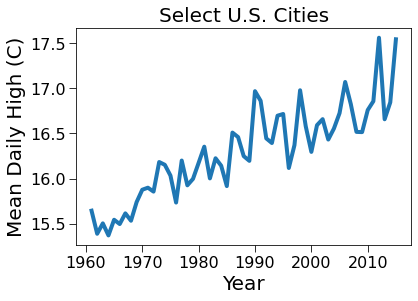

In [43]:
data = getTempData()
years = getYearlyMeans(data)
xVals, yVals = [], []
for e in years:
    xVals.append(e)
    yVals.append(years[e])
pylab.plot(xVals, yVals)
pylab.xlabel('Year')
pylab.ylabel('Mean Daily High (C)')
pylab.title('Select U.S. Cities')

## Initialize things

In [45]:
numSubsets = 10
dimensions = (1, 2, 3, 4)
rSquares = {}
for d in dimensions:
    rSquares[d] = []

## split data

In [46]:
def splitData(xVals, yVals):
    toTrain = random.sample(range(len(xVals)), len(xVals)//2)
    trainX, trainY, testX, testY = [], [], [], []
    for i in range(len(xVals)):
        if i in toTrain:
            trainX.append(xVals[i])
            trainY.append(yVals[i])
        else:
            testX.append(xVals[i])
            testY.append(yVals[i])
    return trainX, trainY, testX, testY

## train, test, and report

In [48]:
for f in range(numSubsets):
    trainX, trainY, testX, testY = splitData(xVals, yVals)
    for d in dimensions:
        model = pylab.polyfit(trainX, trainY, d)
        #estYVals = pylab.polyval(model, trainX)
        estYVals = pylab.polyval(model, testX)
        rSquares[d].append(rSquared(testY, estYVals))
print('Mean R-squares for test data')
for d in dimensions:
    mean = round(sum(rSquares[d])/len(rSquares[d]), 4)
    sd = round(numpy.std(rSquares[d]), 4)
    print('For dimensionality', d,  'mean =', mean, 'Std =', sd)

Mean R-squares for test data
For dimensionality 1 mean = 0.7357 Std = 0.0586
For dimensionality 2 mean = 0.7083 Std = 0.0658
For dimensionality 3 mean = 0.6949 Std = 0.0588
For dimensionality 4 mean = 0.7065 Std = 0.0627


## Results
- line seems to be the winner
    - highest average r-squared
    - smallest deviation across trials
    - simplest model

## Why we should run multiple sets
- note that deviations are a decimal order of magnitude smaller than means
    - suggests that while there is good agreement, deviations are large enough that there could be a noticeable range of variation across trials
- suppose we had just one trial
    - then we could end up with a low $R^2$ value, and erroneously decide that a linear model is not a good fit
    - might reach a different conclusion about validity of linear model

## Wrapping up Curve Fitting
- we can use linear regression to fit a curve to data
    - mapping from independent values to dependent values
- that curve is a model of the data that can be used to predict the value associated with independent  values we haven't seen (out of sample data)
- R-squared used to evaluate model
    - higher not always "better" because of risk of over fitting
- choose complexity of model based on
    - theory about structure of data
    - cross validation
    - simplicity